# Telecom Churn Prediction


#### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate.
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

In this competition, your goal is to build a machine learning model that is able to predict churning customers based on the features provided for their usage.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly

from collections import Counter # To do counter of some features
import plotly.io as pio


# Supress warnings
warnings.filterwarnings('ignore')

## 1. Reading and Understanding the data

In [2]:
# Reading the train data set

Telecom_df = pd.read_csv('train.csv')

In [3]:
#Summary of the data set

Telecom_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

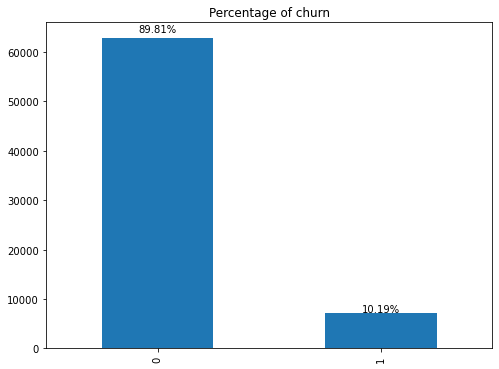

In [4]:
#Percentage of churn in the current data

plt.title("Percentage of churn")
ax = Telecom_df["churn_probability"].value_counts().plot.bar(figsize=[8,6])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height/len(Telecom_df["churn_probability"])*100, 2)}%', xy=(x + width/2, y + height*1.02), ha='center')
plt.show()

### Data Cleaning

In [5]:
#Checking for unwanted rows

Telecom_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [6]:
Telecom_df.tail()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
69994,69994,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,15.760,410.924,...,1,0,NaN,1.0,1.0,221,0.00,0.00,0.00,0
69995,69995,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,160.083,289.129,...,0,0,NaN,NaN,NaN,712,0.00,0.00,0.00,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,0,0,NaN,NaN,NaN,879,0.00,0.00,0.00,0
69997,69997,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,238.575,245.414,...,0,0,1.0,1.0,1.0,277,664.25,1402.96,990.97,0
69998,69998,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,168.269,42.815,...,0,0,1.0,NaN,1.0,1876,0.00,0.00,0.00,0


- There is no Incorrect rows - Header rows, footer rows
- There is no Summary rowsTotal, subtotal rows
- There is no Extra rows,Column numbers, indicators, blank rows

In [7]:
for i in Telecom_df.columns:
    print(i)

id
circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc

- There is no missing columns observed
- There is no Inconsistent column names
- No Unique Identifier
- No Misaligned columns
- There is no Columns containing Multiple data values

### Dropping unwanted columns

In [8]:
# Columns having same value across all records hence droping these

for i in Telecom_df.columns[Telecom_df.nunique() <= 1]:
    print(Telecom_df[i].value_counts())

109    69999
Name: circle_id, dtype: int64
0.0    69297
Name: loc_og_t2o_mou, dtype: int64
0.0    69297
Name: std_og_t2o_mou, dtype: int64
0.0    69297
Name: loc_ic_t2o_mou, dtype: int64
6/30/2014    69999
Name: last_date_of_month_6, dtype: int64
7/31/2014    69600
Name: last_date_of_month_7, dtype: int64
8/31/2014    69266
Name: last_date_of_month_8, dtype: int64
0.0    67231
Name: std_og_t2c_mou_6, dtype: int64
0.0    67312
Name: std_og_t2c_mou_7, dtype: int64
0.0    66296
Name: std_og_t2c_mou_8, dtype: int64
0.0    67231
Name: std_ic_t2o_mou_6, dtype: int64
0.0    67312
Name: std_ic_t2o_mou_7, dtype: int64
0.0    66296
Name: std_ic_t2o_mou_8, dtype: int64


In [9]:
Telecom_df.shape

(69999, 172)

In [10]:
# Dropping columns with signle value

DropCol = Telecom_df.columns[Telecom_df.nunique() <= 1].to_frame().index
Telecom_df.drop(DropCol,axis=1,inplace=True)

In [11]:
Telecom_df.shape

(69999, 159)

In [12]:
# 'Id' doesn't add any value since dropping the same

Telecom_df.drop(['id'],axis=1,inplace=True)

In [13]:
# There are no duplicate records

Telecom_df[Telecom_df.duplicated()]

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


### Null value treatment

In [14]:
# Checking for null values
obj = Telecom_df.isnull().sum()
for key,value in obj.iteritems():
    if value > 0 :
        print(key,",",value)

onnet_mou_6 , 2768
onnet_mou_7 , 2687
onnet_mou_8 , 3703
offnet_mou_6 , 2768
offnet_mou_7 , 2687
offnet_mou_8 , 3703
roam_ic_mou_6 , 2768
roam_ic_mou_7 , 2687
roam_ic_mou_8 , 3703
roam_og_mou_6 , 2768
roam_og_mou_7 , 2687
roam_og_mou_8 , 3703
loc_og_t2t_mou_6 , 2768
loc_og_t2t_mou_7 , 2687
loc_og_t2t_mou_8 , 3703
loc_og_t2m_mou_6 , 2768
loc_og_t2m_mou_7 , 2687
loc_og_t2m_mou_8 , 3703
loc_og_t2f_mou_6 , 2768
loc_og_t2f_mou_7 , 2687
loc_og_t2f_mou_8 , 3703
loc_og_t2c_mou_6 , 2768
loc_og_t2c_mou_7 , 2687
loc_og_t2c_mou_8 , 3703
loc_og_mou_6 , 2768
loc_og_mou_7 , 2687
loc_og_mou_8 , 3703
std_og_t2t_mou_6 , 2768
std_og_t2t_mou_7 , 2687
std_og_t2t_mou_8 , 3703
std_og_t2m_mou_6 , 2768
std_og_t2m_mou_7 , 2687
std_og_t2m_mou_8 , 3703
std_og_t2f_mou_6 , 2768
std_og_t2f_mou_7 , 2687
std_og_t2f_mou_8 , 3703
std_og_mou_6 , 2768
std_og_mou_7 , 2687
std_og_mou_8 , 3703
isd_og_mou_6 , 2768
isd_og_mou_7 , 2687
isd_og_mou_8 , 3703
spl_og_mou_6 , 2768
spl_og_mou_7 , 2687
spl_og_mou_8 , 3703
og_others_6 ,

In [15]:
# Checking the number of missing values and its percentage
missing_values_count = Telecom_df.isnull().sum().sort_values(ascending = False)
missing_values_perc = (100*Telecom_df.isnull().sum()/Telecom_df.shape[0]).sort_values(ascending = False)
df_missing_values = pd.concat([missing_values_count,missing_values_perc], axis=1, keys=['Missing Values', 'Missing Values %'])
df_missing_values[df_missing_values['Missing Values %']>0]

,Missing Values,Missing Values %
av_rech_amt_data_6,52431,74.902499
count_rech_3g_6,52431,74.902499
arpu_3g_6,52431,74.902499
arpu_2g_6,52431,74.902499
max_rech_data_6,52431,74.902499
...,...,...
spl_og_mou_7,2687,3.838626
std_ic_t2t_mou_7,2687,3.838626
date_of_last_rech_8,2461,3.515765
date_of_last_rech_7,1234,1.762882


In [16]:
#columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8','av_rech_amt_data_6', 
               'av_rech_amt_data_7', 'av_rech_amt_data_8','max_rech_data_6', 'max_rech_data_7', 
               'max_rech_data_8','night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6',
              'fb_user_7','fb_user_8','arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8',
              'count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7',
               'count_rech_3g_8']

# impute missing values with 0
Telecom_df[zero_impute] = Telecom_df[zero_impute].apply(lambda x: x.fillna(0))

In [17]:
#Columns where we will impute missing values with median
#All null values for onnet and offnet minutes of usage voice calls has been replaced 
#with median to keep the distribution

mou = ['onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8']
Telecom_df[mou] = Telecom_df[mou].apply(lambda x: x.fillna(x.median()))

In [18]:
#Columns where we will impute missing values with median
#All null values for outgoing and incoming minutes of usage voice calls has been replaced 
#with median to keep the distribution
ogicarray = []
for i in Telecom_df.columns:
    if 'og' in i or 'ic' in i:
        ogicarray.append(i)
    
for i in ogicarray:
    print(i)
print(len(ogicarray))

Telecom_df[ogicarray] = Telecom_df[ogicarray].apply(lambda x: x.fillna(x.median()))

roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7
std_ic_t2t_mou_8
std_ic_t2m_mou_6
std_ic_t2m_mou_7
std_ic_t2m_mou_8
std_ic_t2f_mou_6
std_ic_t2f_

In [19]:
# Handling dates columns
dates = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
         'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']

In [20]:
Telecom_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    69999 non-null  float64
 1    arpu_7                    69999 non-null  float64
 2    arpu_8                    69999 non-null  float64
 3    onnet_mou_6               69999 non-null  float64
 4    onnet_mou_7               69999 non-null  float64
 5    onnet_mou_8               69999 non-null  float64
 6    offnet_mou_6              69999 non-null  float64
 7    offnet_mou_7              69999 non-null  float64
 8    offnet_mou_8              69999 non-null  float64
 9    roam_ic_mou_6             69999 non-null  float64
 10   roam_ic_mou_7             69999 non-null  float64
 11   roam_ic_mou_8             69999 non-null  float64
 12   roam_og_mou_6             69999 non-null  float64
 13   roam_og_mou_7             69999 non-null  fl

### Outlier treatment

In [21]:
NumCols = Telecom_df.select_dtypes(include=['int64','float64']).columns
NumCols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=152)

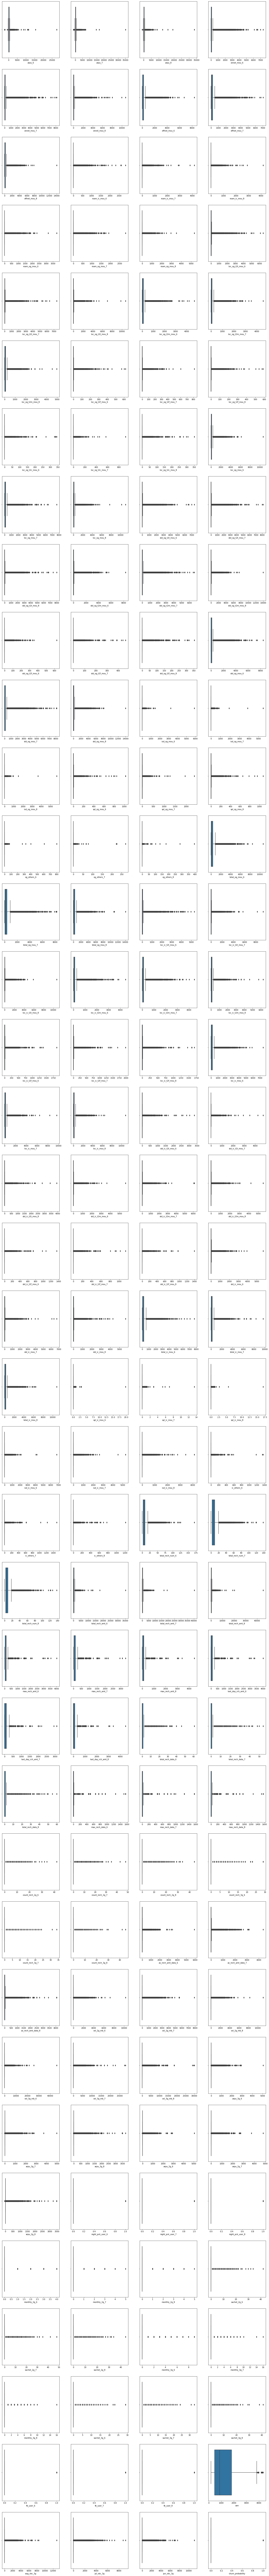

In [22]:
fig, axs = plt.subplots(38,4,figsize=(25,250))
j=0
for i in NumCols:
    if(j>=4):
        k=j%4
    else:
        k=j
    sns.boxplot(Telecom_df[i],ax=axs[j//4][k])
    j+=1
fig.show()

In [23]:
numeric_cols = []
for i in Telecom_df.columns[Telecom_df.nunique() > 3]:
    if('date' not in i ):
        numeric_cols.append(i)
print(len(numeric_cols))

145


In [24]:
#Telecom_df1 = Telecom_df
#Telecom_df2 = Telecom_df

In [25]:
#Telecom_df1.shape

for col in numeric_cols:
    q1 = Telecom_df[col].quantile(0.10)
    q3 = Telecom_df[col].quantile(0.90)
    iqr = q3-q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print(col)
    print(low)
    print(high)
    Telecom_df1 = Telecom_df[(Telecom_df[col] > low) & (Telecom_df[col] < high)]

In [26]:
#Telecom_df1.shape

In [27]:
#Telecom_df2.shape

In [28]:
#sns.boxplot(Telecom_df2['arpu_6'])

In [29]:
#sns.boxplot(Telecom_df['arpu_6'])

In [30]:
#Telecom_df2.info(verbose=True,show_counts=True)

In [31]:
Telecom_df = Telecom_df[Telecom_df['arpu_6']<6000]
Telecom_df = Telecom_df[Telecom_df['arpu_7']<15000]
Telecom_df = Telecom_df[Telecom_df['arpu_8']<8000]

Telecom_df = Telecom_df[Telecom_df['offnet_mou_6']<6000]
Telecom_df = Telecom_df[Telecom_df['offnet_mou_7']<6000]
Telecom_df = Telecom_df[Telecom_df['offnet_mou_8']<6000]

Telecom_df = Telecom_df[Telecom_df['roam_ic_mou_6']<2500]
Telecom_df = Telecom_df[Telecom_df['roam_ic_mou_7']<2500]
Telecom_df = Telecom_df[Telecom_df['roam_ic_mou_8']<4000]

Telecom_df = Telecom_df[Telecom_df['roam_og_mou_6']<2500]
Telecom_df = Telecom_df[Telecom_df['roam_og_mou_7']<2500]
Telecom_df = Telecom_df[Telecom_df['roam_og_mou_7']<2500]

Telecom_df = Telecom_df[Telecom_df['loc_og_t2t_mou_6']<4500]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2t_mou_7']<4500]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2t_mou_8']<3800]

Telecom_df = Telecom_df[Telecom_df['loc_og_t2m_mou_6']<3000]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2m_mou_7']<3000]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2m_mou_8']<2300]

Telecom_df = Telecom_df[Telecom_df['loc_og_t2f_mou_6']<500]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2f_mou_7']<400]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2f_mou_8']<400]

Telecom_df = Telecom_df[Telecom_df['loc_og_t2c_mou_6']<170]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2c_mou_7']<250]
Telecom_df = Telecom_df[Telecom_df['loc_og_t2c_mou_8']<250]

Telecom_df = Telecom_df[Telecom_df['loc_og_mou_6']<5000]
Telecom_df = Telecom_df[Telecom_df['loc_og_mou_7']<7000]
Telecom_df = Telecom_df[Telecom_df['loc_og_mou_8']<6000]

Telecom_df = Telecom_df[Telecom_df['std_og_t2t_mou_6']<5000]
Telecom_df = Telecom_df[Telecom_df['std_og_t2t_mou_7']<6000]
Telecom_df = Telecom_df[Telecom_df['std_og_t2t_mou_8']<6000]

Telecom_df = Telecom_df[Telecom_df['std_og_t2f_mou_6']<400]
Telecom_df = Telecom_df[Telecom_df['std_og_t2f_mou_7']<300]
Telecom_df = Telecom_df[Telecom_df['std_og_t2f_mou_8']<250]

Telecom_df = Telecom_df[Telecom_df['isd_og_mou_6']<1000]
Telecom_df = Telecom_df[Telecom_df['isd_og_mou_8']<800]

Telecom_df = Telecom_df[Telecom_df['spl_og_mou_6']<500]
Telecom_df = Telecom_df[Telecom_df['spl_og_mou_7']<500]
Telecom_df = Telecom_df[Telecom_df['spl_og_mou_8']<600]

Telecom_df = Telecom_df[Telecom_df['og_others_6']<30]
Telecom_df = Telecom_df[Telecom_df['og_others_7']<15]
Telecom_df = Telecom_df[Telecom_df['og_others_8']<12]

##########################################################

#Telecom_df = Telecom_df[Telecom_df['loc_ic_t2t_mou_6']<4500]
Telecom_df = Telecom_df[Telecom_df['loc_ic_t2t_mou_7']<4500]
Telecom_df = Telecom_df[Telecom_df['loc_ic_t2t_mou_8']<4500]

#Telecom_df = Telecom_df[Telecom_df['loc_ic_t2m_mou_6']<3000]
#Telecom_df = Telecom_df[Telecom_df['loc_ic_t2m_mou_7']<3000]
Telecom_df = Telecom_df[Telecom_df['loc_ic_t2m_mou_8']<4000]

Telecom_df = Telecom_df[Telecom_df['loc_ic_t2f_mou_6']<1200]
Telecom_df = Telecom_df[Telecom_df['loc_ic_t2f_mou_7']<1200]
Telecom_df = Telecom_df[Telecom_df['loc_ic_t2f_mou_8']<1200]

Telecom_df = Telecom_df[Telecom_df['loc_ic_mou_6']<6000]
Telecom_df = Telecom_df[Telecom_df['loc_ic_mou_7']<6000]
Telecom_df = Telecom_df[Telecom_df['loc_ic_mou_8']<8000]

#Telecom_df = Telecom_df[Telecom_df['std_ic_t2t_mou_6']<5000]
Telecom_df = Telecom_df[Telecom_df['std_ic_t2t_mou_7']<2500]
Telecom_df = Telecom_df[Telecom_df['std_ic_t2t_mou_8']<2500]

Telecom_df = Telecom_df[Telecom_df['std_ic_t2m_mou_6']<3000]
Telecom_df = Telecom_df[Telecom_df['std_ic_t2m_mou_7']<4000]
Telecom_df = Telecom_df[Telecom_df['std_ic_t2m_mou_8']<3500]

Telecom_df = Telecom_df[Telecom_df['std_ic_t2f_mou_6']<800]
Telecom_df = Telecom_df[Telecom_df['std_ic_t2f_mou_7']<600]
Telecom_df = Telecom_df[Telecom_df['std_ic_t2f_mou_8']<600]

Telecom_df = Telecom_df[Telecom_df['isd_ic_mou_6']<4000]
Telecom_df = Telecom_df[Telecom_df['isd_ic_mou_7']<4000]
Telecom_df = Telecom_df[Telecom_df['isd_ic_mou_8']<3000]

Telecom_df = Telecom_df[Telecom_df['spl_ic_mou_6']<1]
Telecom_df = Telecom_df[Telecom_df['spl_ic_mou_7']<1.25]
Telecom_df = Telecom_df[Telecom_df['spl_ic_mou_8']<1.25]

Telecom_df = Telecom_df[Telecom_df['ic_others_6']<600]
Telecom_df = Telecom_df[Telecom_df['ic_others_7']<500]
Telecom_df = Telecom_df[Telecom_df['ic_others_8']<800]

#############################################################################

Telecom_df = Telecom_df[Telecom_df['total_rech_num_6']<100]
Telecom_df = Telecom_df[Telecom_df['total_rech_num_6']<90]
Telecom_df = Telecom_df[Telecom_df['total_rech_num_6']<100]

Telecom_df = Telecom_df[Telecom_df['max_rech_amt_6']<2500]
Telecom_df = Telecom_df[Telecom_df['max_rech_amt_7']<2500]
Telecom_df = Telecom_df[Telecom_df['max_rech_amt_8']<2500]

Telecom_df = Telecom_df[Telecom_df['last_day_rch_amt_6']<2500]
Telecom_df = Telecom_df[Telecom_df['last_day_rch_amt_7']<1250]
Telecom_df = Telecom_df[Telecom_df['last_day_rch_amt_8']<2500]

Telecom_df = Telecom_df[Telecom_df['total_rech_data_6']<35]
#Telecom_df = Telecom_df[Telecom_df['total_rech_data_7']<500]
#Telecom_df = Telecom_df[Telecom_df['total_rech_data_8']<800]

Telecom_df = Telecom_df[Telecom_df['max_rech_data_6']<1000]
Telecom_df = Telecom_df[Telecom_df['max_rech_data_7']<1000]
Telecom_df = Telecom_df[Telecom_df['max_rech_data_8']<1000]

Telecom_df = Telecom_df[Telecom_df['count_rech_2g_6']<35]
Telecom_df = Telecom_df[Telecom_df['count_rech_2g_7']<30]
Telecom_df = Telecom_df[Telecom_df['count_rech_2g_8']<35]

Telecom_df = Telecom_df[Telecom_df['count_rech_3g_6']<25]
Telecom_df = Telecom_df[Telecom_df['count_rech_3g_7']<25]
Telecom_df = Telecom_df[Telecom_df['count_rech_3g_8']<30]

Telecom_df = Telecom_df[Telecom_df['av_rech_amt_data_6']<2500]
Telecom_df = Telecom_df[Telecom_df['av_rech_amt_data_7']<2500]
Telecom_df = Telecom_df[Telecom_df['av_rech_amt_data_8']<2500]

Telecom_df = Telecom_df[Telecom_df['vol_2g_mb_6']<8000]
Telecom_df = Telecom_df[Telecom_df['vol_2g_mb_7']<6000]
Telecom_df = Telecom_df[Telecom_df['vol_2g_mb_8']<8000]

Telecom_df = Telecom_df[Telecom_df['vol_3g_mb_6']<15000]
Telecom_df = Telecom_df[Telecom_df['vol_3g_mb_7']<15000]
Telecom_df = Telecom_df[Telecom_df['vol_3g_mb_8']<14000]

Telecom_df = Telecom_df[Telecom_df['arpu_2g_6']<3000]
Telecom_df = Telecom_df[Telecom_df['arpu_2g_7']<2000]
Telecom_df = Telecom_df[Telecom_df['arpu_2g_8']<2000]

Telecom_df = Telecom_df[Telecom_df['arpu_3g_6']<2500]
Telecom_df = Telecom_df[Telecom_df['arpu_3g_7']<2000]
Telecom_df = Telecom_df[Telecom_df['arpu_3g_8']<2000]


In [32]:
#Telecom_df2.shape

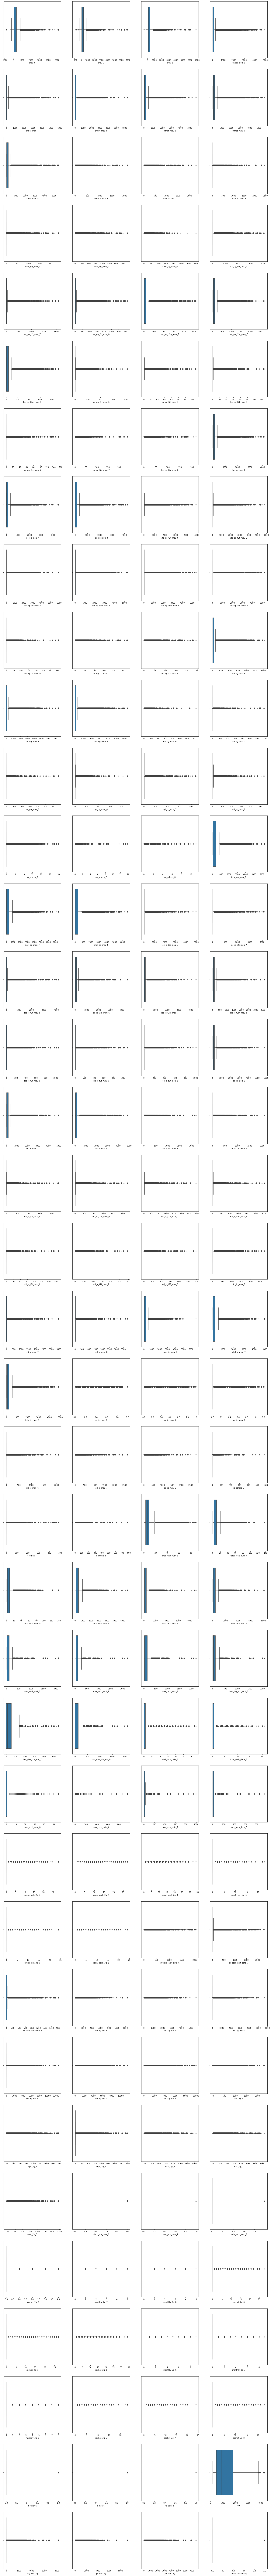

In [33]:
fig, axs = plt.subplots(38,4,figsize=(25,250))
j=0
for i in NumCols:
    if(j>=4):
        k=j%4
    else:
        k=j
    sns.boxplot(Telecom_df[i],ax=axs[j//4][k])
    j+=1
fig.show()

In [34]:
Telecom_df.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69653 entries, 0 to 69998
Data columns (total 158 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    arpu_6                    69653 non-null  float64
 1    arpu_7                    69653 non-null  float64
 2    arpu_8                    69653 non-null  float64
 3    onnet_mou_6               69653 non-null  float64
 4    onnet_mou_7               69653 non-null  float64
 5    onnet_mou_8               69653 non-null  float64
 6    offnet_mou_6              69653 non-null  float64
 7    offnet_mou_7              69653 non-null  float64
 8    offnet_mou_8              69653 non-null  float64
 9    roam_ic_mou_6             69653 non-null  float64
 10   roam_ic_mou_7             69653 non-null  float64
 11   roam_ic_mou_8             69653 non-null  float64
 12   roam_og_mou_6             69653 non-null  float64
 13   roam_og_mou_7             69653 non-null  fl

### Deriving new features

## 2. Exploratory Data Analysis/Data Visualization

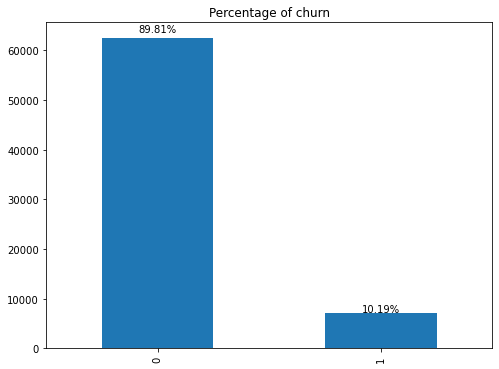

In [35]:
#Percentage of churn in the current data

plt.title("Percentage of churn")
ax = Telecom_df["churn_probability"].value_counts().plot.bar(figsize=[8,6])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height/len(Telecom_df["churn_probability"])*100, 2)}%', xy=(x + width/2, y + height*1.02), ha='center')
plt.show()

In [36]:
tr0 = go.Bar(
            x = Telecom_df[Telecom_df["churn_probability"]== 1]["churn_probability"].value_counts().index.values,
            y = Telecom_df[Telecom_df["churn_probability"]== 1]["churn_probability"].value_counts().values,
            name='Churned'
    )

tr1 = go.Bar(
            x = Telecom_df[Telecom_df["churn_probability"]== 0]["churn_probability"].value_counts().index.values,
            y = Telecom_df[Telecom_df["churn_probability"]== 0]["churn_probability"].value_counts().values,
            name='Not Churned'
    )

data = [tr0, tr1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='churn_probability Variable'
    ),
    title='Chrun probability variable distribution'
)

fig = go.Figure(data=data, layout=layout)


py.iplot(fig, filename='grouped-bar')

### Univariate Analysis

In [37]:
# quantitative variables
print(len(numeric_cols))

145


In [38]:
ogCols = []
icCols = []
dataCols = []
otherCols = []
for i in numeric_cols:
    if 'og' in i:
        ogCols.append(i)
    elif 'ic' in i:
        icCols.append(i)
    elif 'data' in i or '2g' in i or '3g' in i:
        dataCols.append(i)
    else:
        otherCols.append(i)

print(len(ogCols))
print(len(icCols))
print(len(dataCols))
print(len(otherCols))
    

42
39
42
22


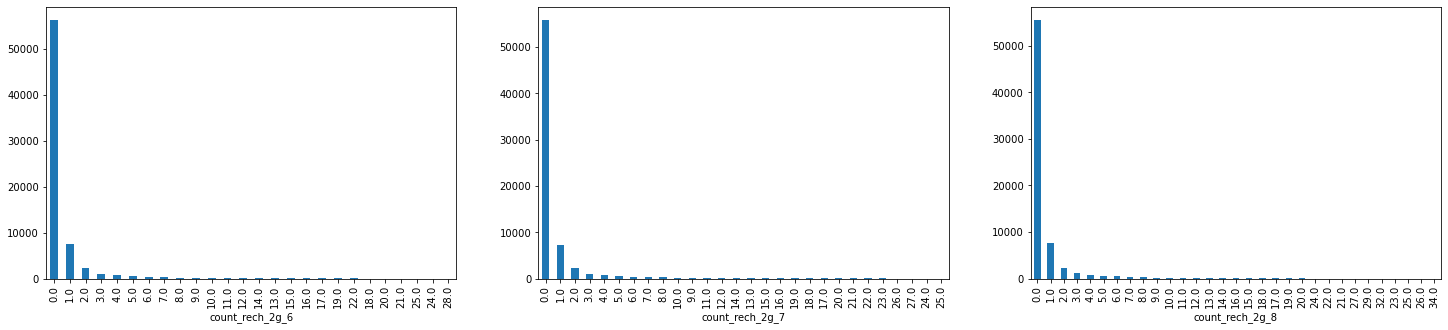

In [39]:
#count_rech_2g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(25,5))
Telecom_df.count_rech_2g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.count_rech_2g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.count_rech_2g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('count_rech_2g_6')
axs[1].set_xlabel('count_rech_2g_7')
axs[2].set_xlabel('count_rech_2g_8')
fig.show()

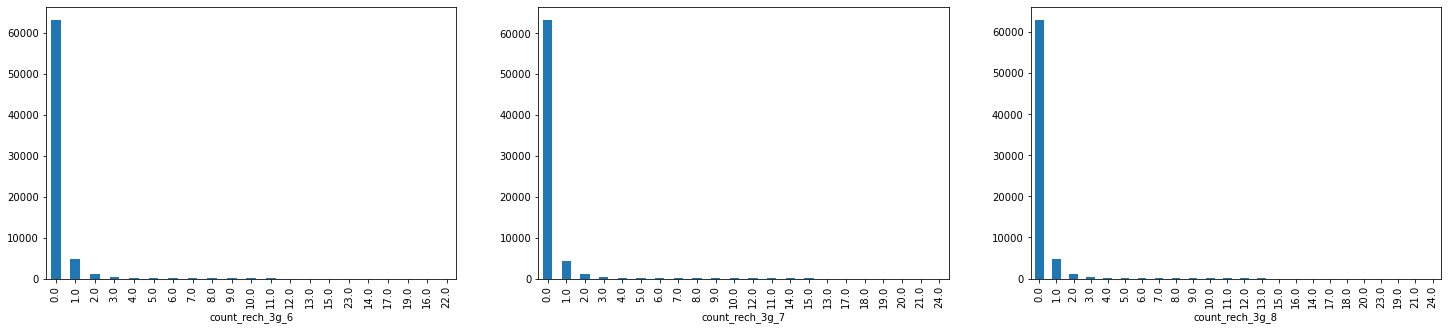

In [40]:
#count_rech_3g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(25,5))
Telecom_df.count_rech_3g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.count_rech_3g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.count_rech_3g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('count_rech_3g_6')
axs[1].set_xlabel('count_rech_3g_7')
axs[2].set_xlabel('count_rech_3g_8')
fig.show()

- Number of people using 2g seems to be more than 3g as per the above graphs
- Number of people using 2g or 3g across 3 months are almost similar

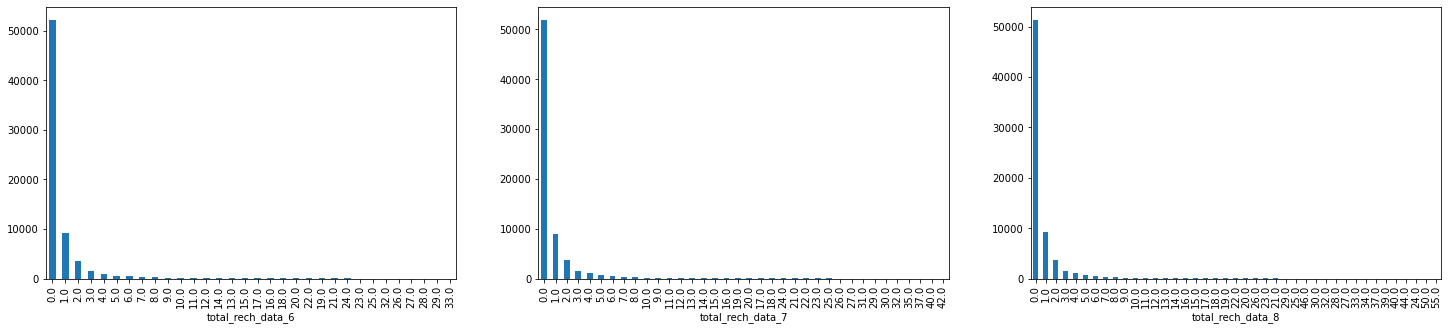

In [41]:
#total_rech_data across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(25,5))
Telecom_df.total_rech_data_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.total_rech_data_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.total_rech_data_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('total_rech_data_6')
axs[1].set_xlabel('total_rech_data_7')
axs[2].set_xlabel('total_rech_data_8')
fig.show()

- Total reacharge data is similar across all 3 months

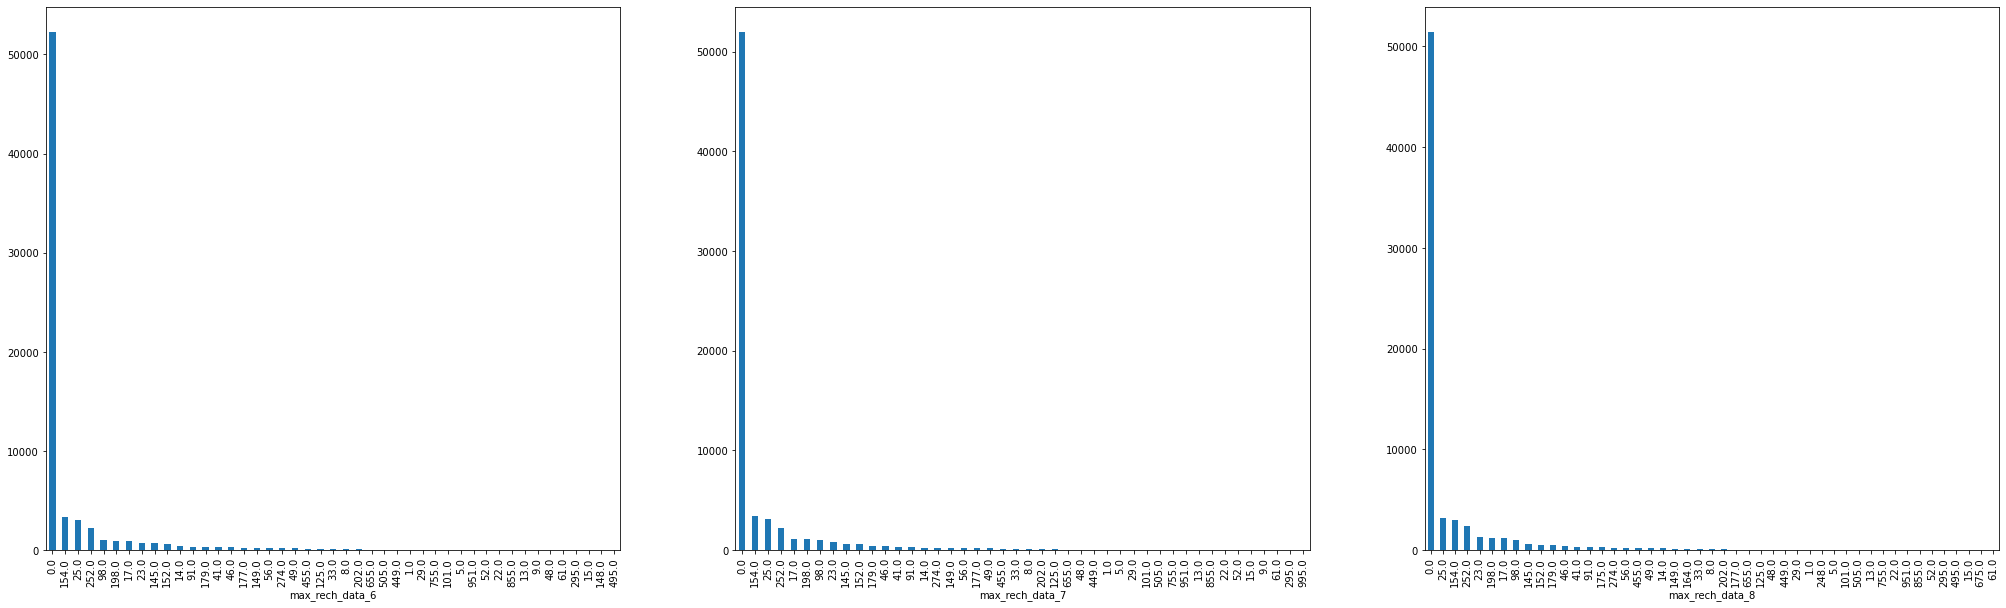

In [42]:
#max_rech_data across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.max_rech_data_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.max_rech_data_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.max_rech_data_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('max_rech_data_6')
axs[1].set_xlabel('max_rech_data_7')
axs[2].set_xlabel('max_rech_data_8')
fig.show()

- Number of users regarging for max amount 25,17,23 increased for month 7 and 8 compared to amount 154,198 ...

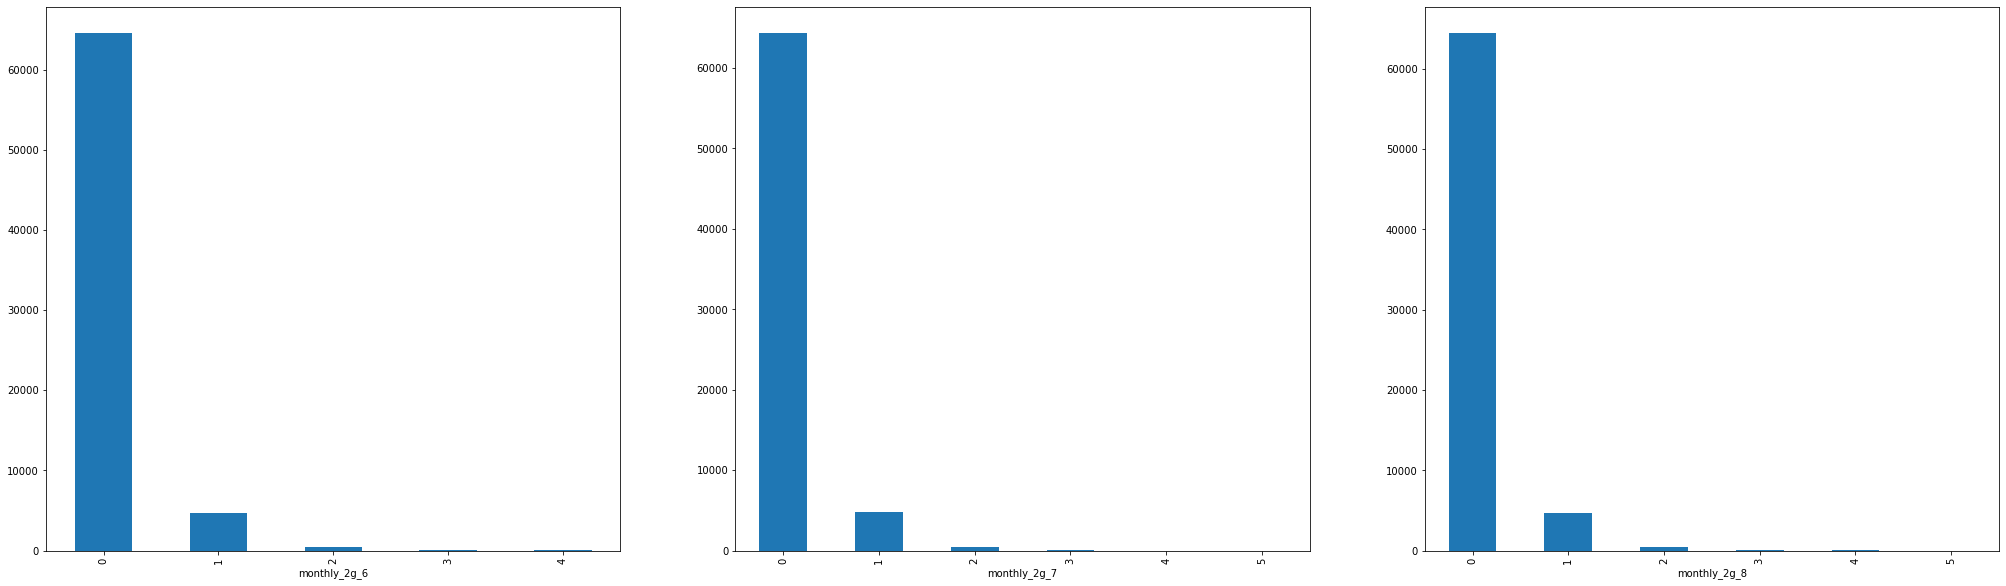

In [43]:
#monthly_2g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.monthly_2g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.monthly_2g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.monthly_2g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('monthly_2g_6')
axs[1].set_xlabel('monthly_2g_7')
axs[2].set_xlabel('monthly_2g_8')
fig.show()

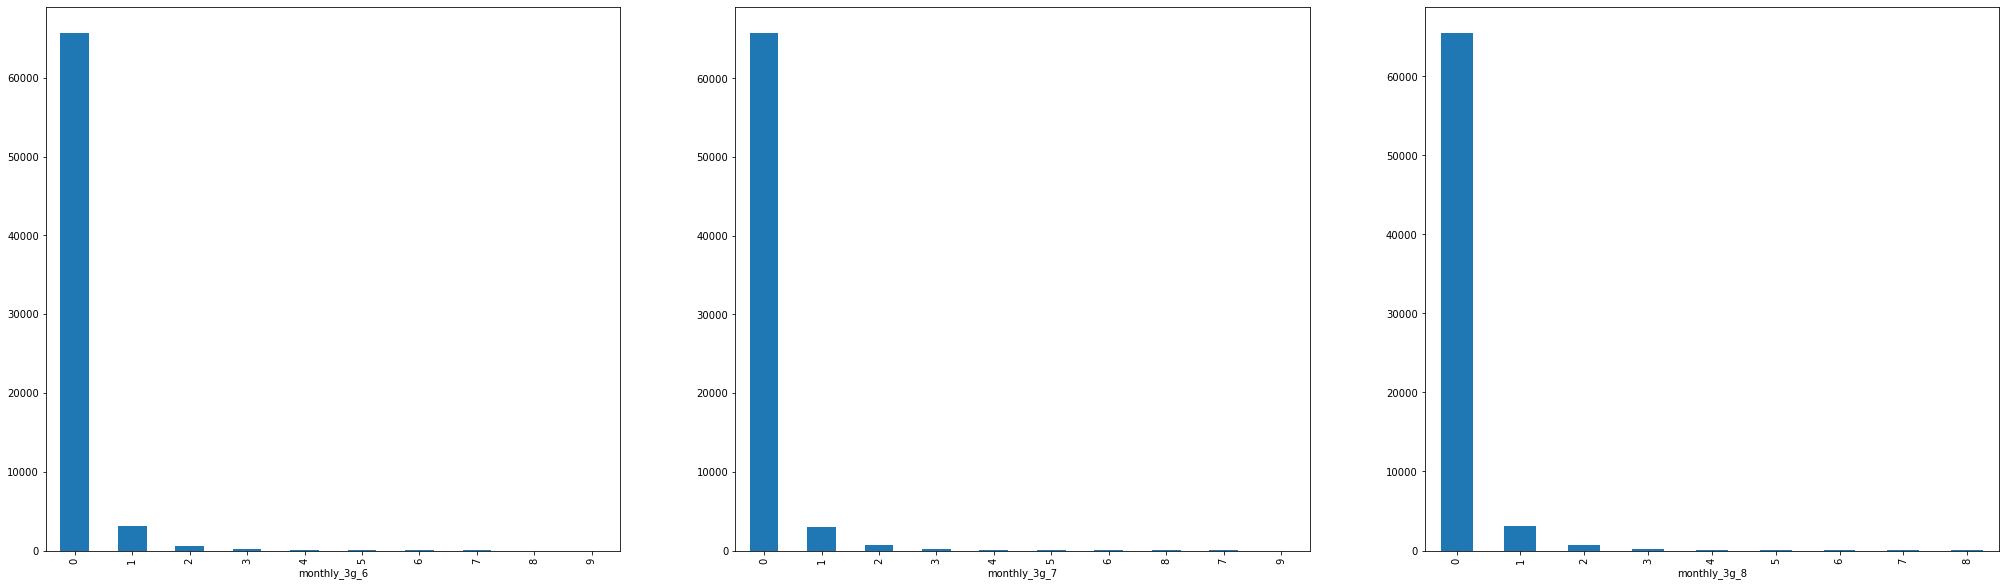

In [44]:
#monthly_3g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.monthly_3g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.monthly_3g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.monthly_3g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('monthly_3g_6')
axs[1].set_xlabel('monthly_3g_7')
axs[2].set_xlabel('monthly_3g_8')
fig.show()

- Customers tend to use more monthly scheme in 3g than 2g

In [45]:
def groupedBarPlot(varName):
    col1 = varName+'_6'
    col2 = varName+'_7'
    col3 = varName+'_8'
    
    df_6 = Telecom_df[col1].values.tolist()
    df_7 = Telecom_df[col2].values.tolist()
    df_8 = Telecom_df[col3].values.tolist()

    #First plot
    tr0 = go.Bar(
        x=Telecom_df[col1].value_counts().index.values,
        y=Telecom_df[col1].value_counts().values,
        name=col1
    )
    #Second plot
    tr1 = go.Bar(
        x=Telecom_df[col2].value_counts().index.values,
        y=Telecom_df[col2].value_counts().values,
        name=col2
    )
    #Third plot
    tr2 = go.Bar(
        x=Telecom_df[col3].value_counts().index.values,
        y=Telecom_df[col3].value_counts().values,
        name=col3
    )

    data = [tr0, tr1, tr2]

    layout = go.Layout(
        yaxis=dict(
            title='Count'
        ),
        xaxis=dict(
            title = varName + ' Variable'
        ),
        title = varName + ' variable distribution'
    )

    fig = go.Figure(data=data,layout = layout)

    py.iplot(fig, filename='grouped-bar')

In [46]:
groupedBarPlot('fb_user')

- Across months fb users are increasing by 100-300 users per month

In [47]:
groupedBarPlot('night_pck_user')

- Number of users using night pack is very less
- Across month the users using night pack is decreasing

In [48]:
Telecom_df.arpu_6.value_counts()

 0.000      2600
-5.000        72
 20.000       72
 1.000        49
 1.500        38
            ... 
 393.027       1
 48.879        1
 179.191       1
 99.516        1
 168.269       1
Name: arpu_6, Length: 61305, dtype: int64

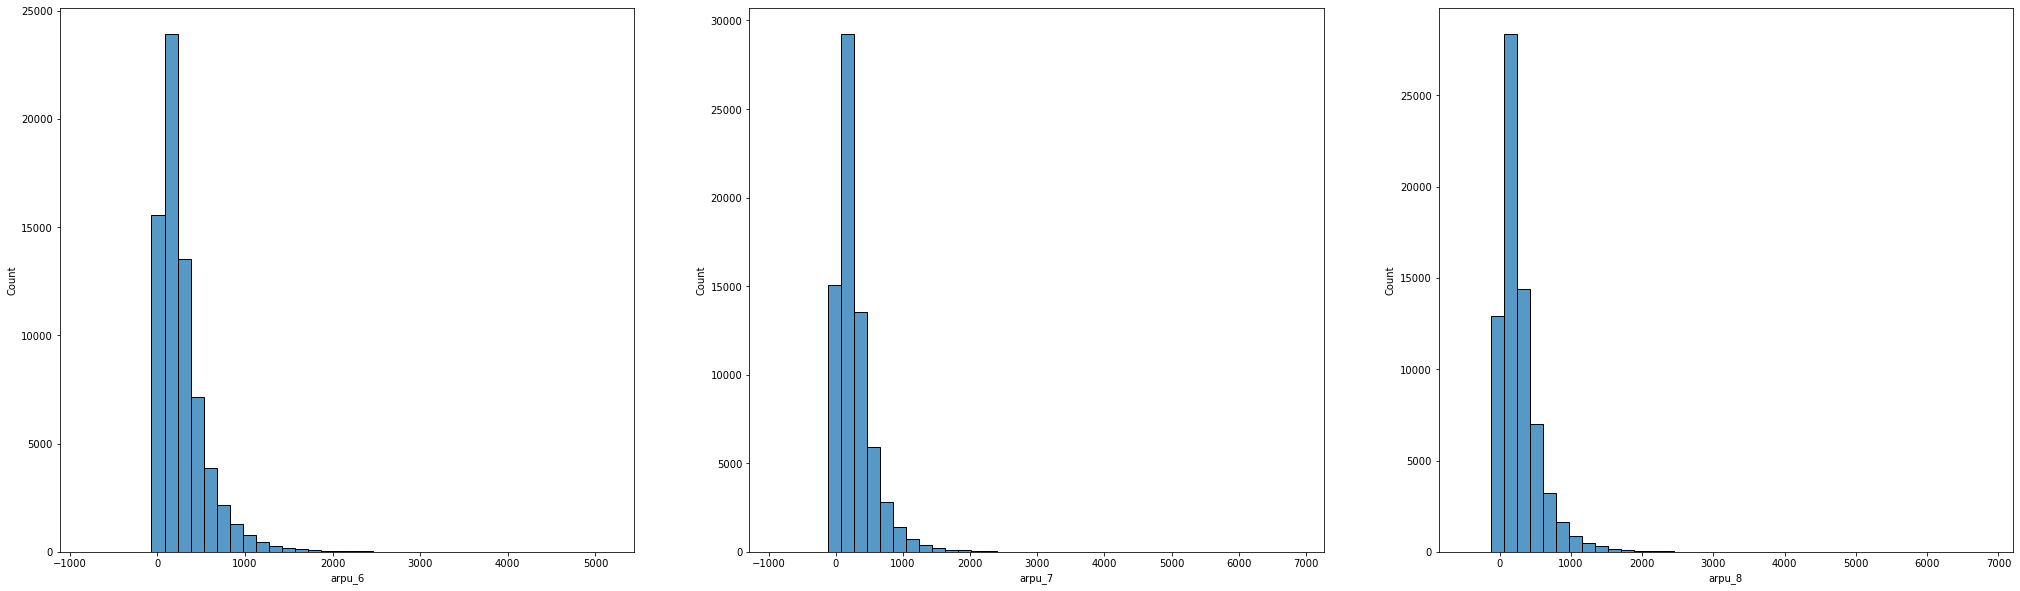

In [52]:
fig, axs = plt.subplots(1,3,figsize=(35,10))
sns.histplot(Telecom_df['arpu_6'],bins=40, ax=axs[0])
sns.histplot(Telecom_df['arpu_7'],bins=40, ax=axs[1])
sns.histplot(Telecom_df['arpu_8'],bins=40, ax=axs[2])
fig.show()

- Average revenue is increasing across the months (around 200-400)

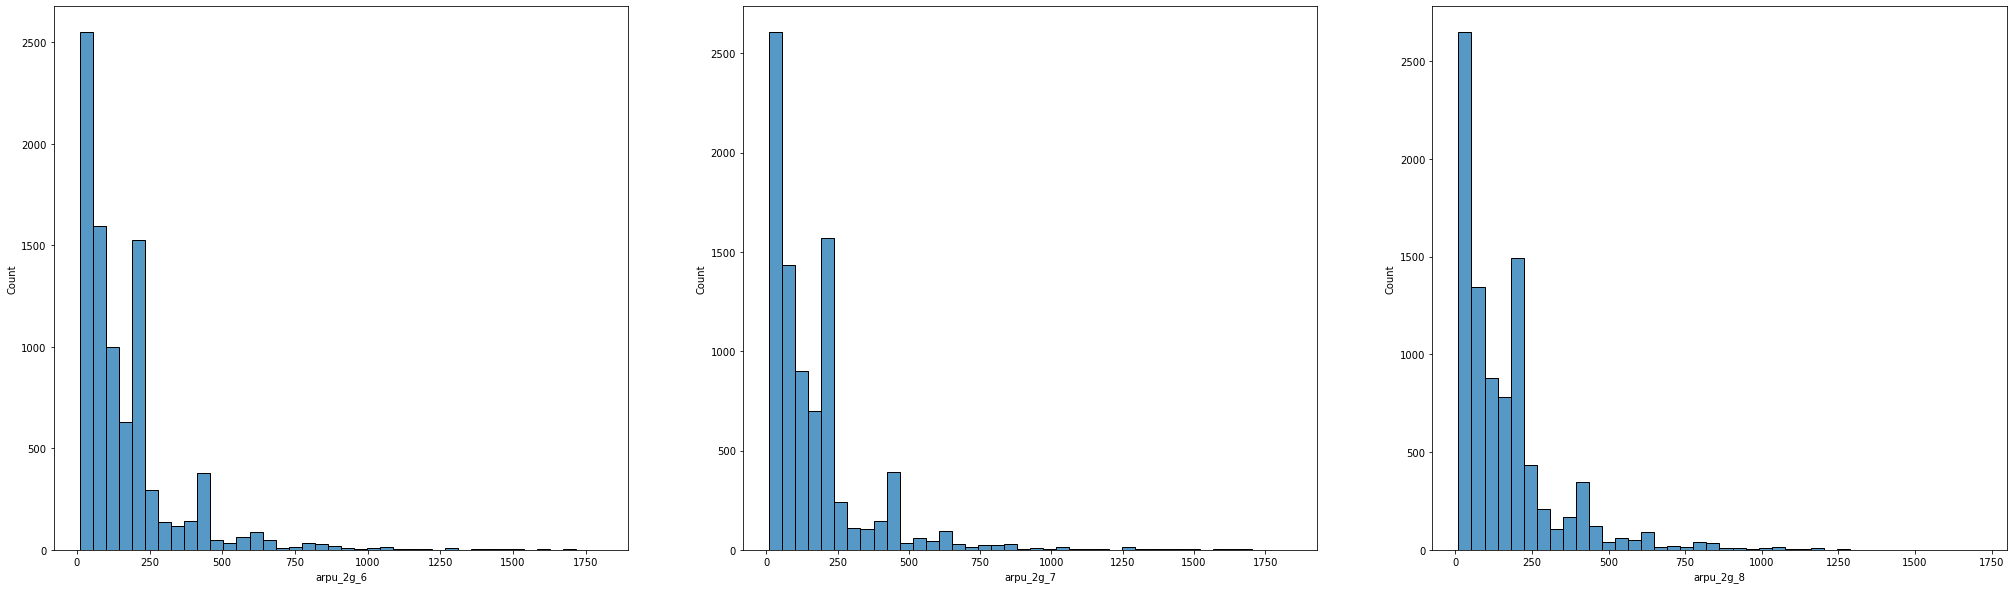

In [61]:
fig, axs = plt.subplots(1,3,figsize=(35,10))
sns.histplot(Telecom_df[Telecom_df['arpu_2g_6']>10.0]['arpu_2g_6'],bins=40, ax=axs[0])
sns.histplot(Telecom_df[Telecom_df['arpu_2g_7']>10.0]['arpu_2g_7'],bins=40, ax=axs[1])
sns.histplot(Telecom_df[Telecom_df['arpu_2g_8']>10.0]['arpu_2g_8'],bins=40, ax=axs[2])
fig.show()

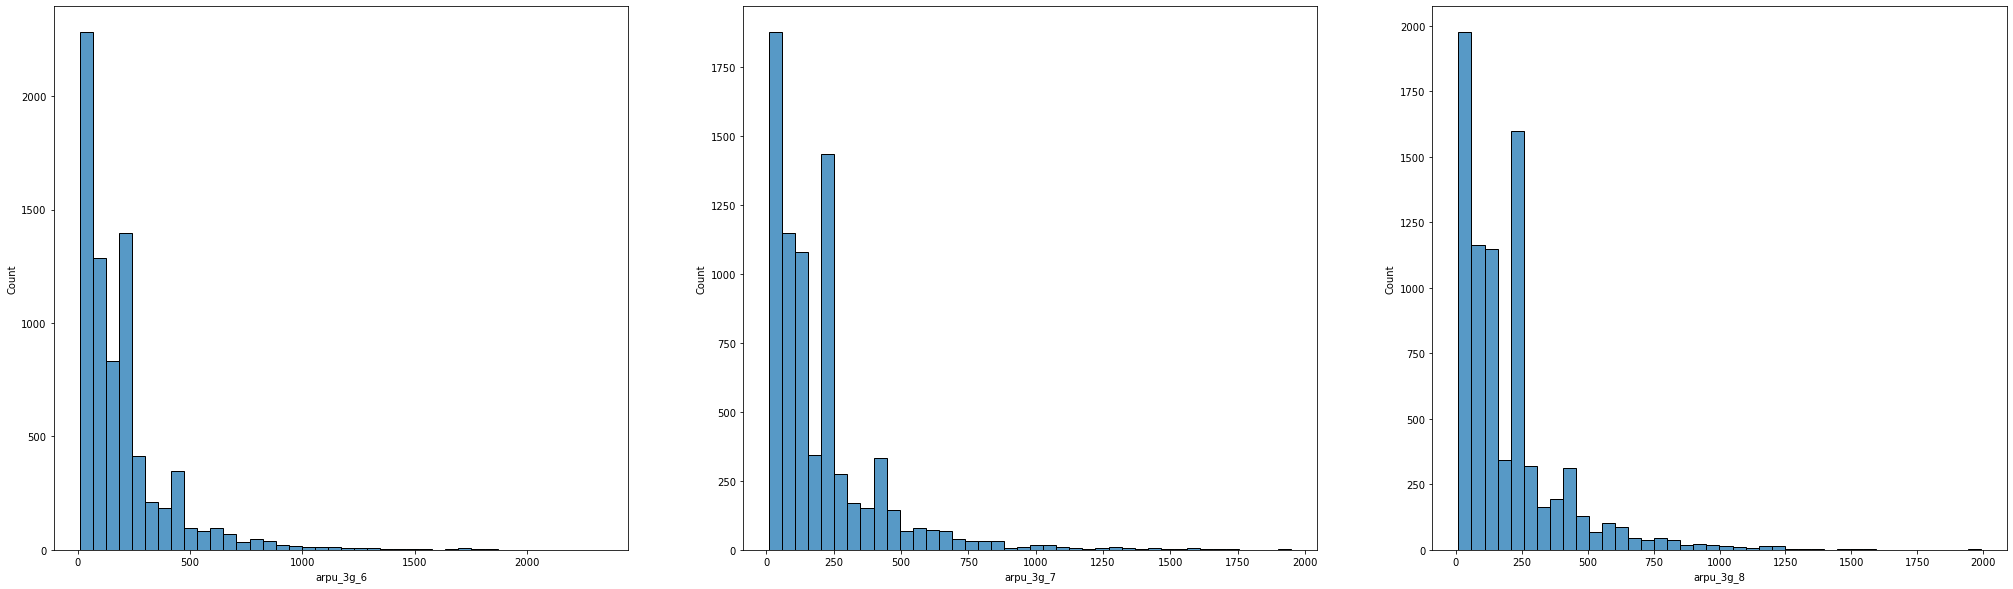

In [62]:
fig, axs = plt.subplots(1,3,figsize=(35,10))
sns.histplot(Telecom_df[Telecom_df['arpu_3g_6']>10.0]['arpu_3g_6'],bins=40, ax=axs[0])
sns.histplot(Telecom_df[Telecom_df['arpu_3g_7']>10.0]['arpu_3g_7'],bins=40, ax=axs[1])
sns.histplot(Telecom_df[Telecom_df['arpu_3g_8']>10.0]['arpu_3g_8'],bins=40, ax=axs[2])
fig.show()

- Average reveneue across months for 2g looks similar
- Average reveneue across months shows slight increase for 3g

In [ ]:
sns.histplot(Telecom_df['arpu_7'])

In [ ]:
df_arpu_6 = df_credit[df_credit["arpu_6"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.histplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.histplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
plt.show()

In [ ]:
#arpu_2g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.arpu_2g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.arpu_2g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.arpu_2g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('arpu_2g_6')
axs[1].set_xlabel('arpu_2g_7')
axs[2].set_xlabel('arpu_2g_8')
fig.show()

In [ ]:
#arpu_3g across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.arpu_3g_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.arpu_3g_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.arpu_3g_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('arpu_3g_6')
axs[1].set_xlabel('arpu_3g_7')
axs[2].set_xlabel('arpu_3g_8')
fig.show()

In [ ]:
#vol_2g_mb across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.vol_2g_mb_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.vol_2g_mb_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.vol_2g_mb_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('vol_2g_mb_6')
axs[1].set_xlabel('vol_2g_mb_7')
axs[2].set_xlabel('vol_2g_mb_8')
fig.show()

In [ ]:
#vol_3g_mb across months 6,7 and 8
fig, axs = plt.subplots(1,3,figsize=(35,10))
Telecom_df.vol_3g_mb_6.sort_values().value_counts().plot.bar(ax = axs[0])
Telecom_df.vol_3g_mb_7.sort_values().value_counts().plot.bar(ax = axs[1])
Telecom_df.vol_3g_mb_8.sort_values().value_counts().plot.bar(ax = axs[2])
axs[0].set_xlabel('vol_3g_mb_6')
axs[1].set_xlabel('vol_3g_mb_7')
axs[2].set_xlabel('vol_3g_mb_8')
fig.show()

In [ ]:
sns.pairplot(Telecom_df[''])
plt.show()

In [ ]:
sns.pairplot(Telecom_df[icCols])
plt.show()

In [ ]:
sns.pairplot(Telecom_df[dataCols])
plt.show()

In [ ]:
sns.pairplot(Telecom_df[otherCols])
plt.show()

In [ ]:
fig, axs = plt.subplots(11,4,figsize=(25,150))
j=0
for i in ogCols:
    if(j>=4):
        k=j%4
    else:
        k=j
    sns.histplot(Telecom_df[i],ax=axs[j//4][k])
    j+=1
fig.show()